In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
#names = pd.read_text("imports-85.names")
column_names = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides",
               "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
               "pH", "sulphates","alcohol","quality"]
raw_dataset = pd.read_csv('winequality-red.csv',
                          na_values = "?", comment = '\t',
                         sep = ";", skipinitialspace = True)

#raw_dataset = pd.DataFrame(raw_dataset, columns = column_names)
dataset = raw_dataset.copy()
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
dataset.shape

(1599, 12)

In [64]:
lis = list(dataset['City1'].str.split(' ', expand=True).stack().unique())
len(lis)

90

In [18]:
# i cannot assign unique numbers to the string data because they are too much 90 Unique city


target = dataset.pop("quality")


In [21]:
bias = []
for i in range(1599):
    bias.append(1)
bias = np.asarray(bias)
dataset.insert (0, "bias", bias)
dataset

,bias,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,1,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,1,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,1,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,1,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,1,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,1,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [22]:
dataset.shape

(1599, 12)

In [23]:
dataset.to_csv('datafile.csv', header=False, index=False)
target.to_csv('target.csv', header=False, index=False)

In [24]:
dataset = pd.read_csv("datafile.csv")
target = pd.read_csv("target.csv")

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)

(1278, 12)
(1278, 1)


In [27]:
def Gradient_fbeta(train,target,beta):
    X = np.transpose(train)
    Y = target
    B = beta
    
    # using the gradient of beta function df(beta)/dbeta
    first = np.dot(train, B)
    second = target - first 
    second1 = X * -2
    grad = np.dot(second1, second)
    
    return grad

In [28]:
def function_fbeta(train,target,beta):
    X = np.transpose(train)
    Y = np.transpose(target)
    B = np.transpose(beta)
    first = np.dot(B,X)
    first = np.dot(first, train)
    first = np.dot(first, beta)
    second = Y * 2
    second = np.dot(second, train)
    second = np.dot(second, beta)
    third = np.dot(Y, target)
    final = (first - second) + third
    
    return final
    
    

In [29]:
def RMSE(new_beta, x_test, y_test):
    pred = np.dot(x_test, new_beta)
    sq_loss = (np.subtract(y_test, pred))**2
    sq_loss = np.mean(sq_loss)
    Rmse = np.sqrt(sq_loss)
    
    return Rmse

# For learn-linregDG and Minimize_GD

In [30]:
def minimize_GD(gradient, beta, train, target, learn_rate, epoch, x_test, y_test):
    diff = []
    count = []
    Rmse = [] 
    for i in range(epoch):
        new_beta = beta - (learn_rate * gradient)
        diff.append(function_fbeta(train,target,beta) - function_fbeta(train,target,new_beta))
        count.append(i)
        Rmse.append(RMSE(new_beta, x_test, y_test))
        beta = new_beta
            
    return new_beta, diff, count, Rmse
            
        

In [31]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
def learn_linregGD(train, target, beta, learn_rate, epoch, x_test, y_test):
    X = train
    Y = target
    B = beta
    Beta, diff, itr, Rmse = minimize_GD(Gradient_fbeta(X, Y, beta), B, X, Y,learn_rate, epoch, x_test, y_test ) 
    
     
       
    return Beta, diff, itr, Rmse

In [33]:
lrate = 0.01
epoch = 110
beta = np.zeros(12)
beta = beta.reshape(12,1)
model, diff, itr, Rmse = learn_linregGD(x_train, y_train, beta, lrate, epoch, x_test, y_test)
model

array([[ 15853.2       ],
       [132577.5       ],
       [  8230.959     ],
       [  4430.866     ],
       [ 40568.99      ],
       [  1370.7892    ],
       [253543.4       ],
       [736005.6       ],
       [ 15801.217982  ],
       [ 52457.768     ],
       [ 10542.994     ],
       [166152.28666667]])

In [34]:
Rmse = np.asarray(Rmse)
print(Rmse)

[[  416160.78201477]
 [  832326.25093852]
 [ 1248491.71986641]
 [ 1664657.18879534]
 [ 2080822.65772468]
 [ 2496988.12665422]
 [ 2913153.59558388]
 [ 3329319.06451362]
 [ 3745484.53344341]
 [ 4161650.00237323]
 [ 4577815.47130308]
 [ 4993980.94023294]
 [ 5410146.40916282]
 [ 5826311.87809271]
 [ 6242477.34702262]
 [ 6658642.81595252]
 [ 7074808.28488244]
 [ 7490973.75381235]
 [ 7907139.22274228]
 [ 8323304.69167221]
 [ 8739470.16060214]
 [ 9155635.62953207]
 [ 9571801.098462  ]
 [ 9987966.56739194]
 [10404132.03632188]
 [10820297.50525181]
 [11236462.97418175]
 [11652628.4431117 ]
 [12068793.91204165]
 [12484959.38097159]
 [12901124.84990153]
 [13317290.31883148]
 [13733455.78776142]
 [14149621.25669137]
 [14565786.72562133]
 [14981952.19455128]
 [15398117.66348123]
 [15814283.13241117]
 [16230448.60134112]
 [16646614.07027107]
 [17062779.53920103]
 [17478945.00813098]
 [17895110.47706094]
 [18311275.94599089]
 [18727441.41492084]
 [19143606.8838508 ]
 [19559772.35278076]
 [19975937.82

In [35]:
diff = np.asarray(diff)
diff = diff.reshape(110,1)

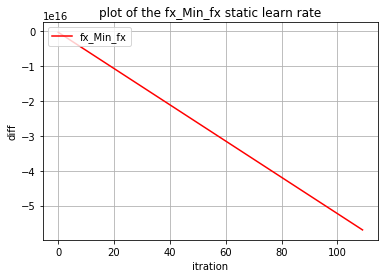

In [36]:
plt.plot(itr,diff, "r" ,label = "fx_Min_fx")
plt.title("plot of the fx_Min_fx static learn rate")
plt.xlabel("itration")
plt.ylabel("diff")
plt.legend(loc="upper left")
plt.grid()
plt.show()

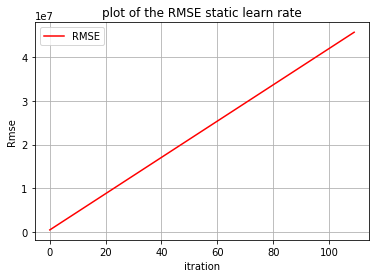

In [37]:
plt.plot(itr,Rmse, "r" ,label = "RMSE")
plt.title("plot of the RMSE static learn rate")
plt.xlabel("itration")
plt.ylabel("Rmse")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Part B backtracking and steplength - bolddriver

In [227]:
def stepsize_backtracking(function_x, gradient_x, train, target,lrt, beta, R_factor):
    mew = 1
    while function_x(train,target,(beta - (mew * (gradient_x(train,target,beta))))) > function_x(train,target,beta) - lrt * mew * np.dot(np.transpose(gradient_x(train,target,beta)), gradient_x(train,target,beta)):
        mew_new  = R_factor * mew
        mew = mew_new
                                                       
    return mew
                                                       

In [228]:
def steplength_bolddriver(function_x, gradient_x, train, target,lrt, beta, R_factor):
    mew = lrt * 1.1
    while function_x(train,target,beta) - function_x(train,target, (beta + (mew * -(gradient_x(train,target,beta)))))<= 0:
        mew_new = mew * R_factor
        mew = mew_new
    return mew

In [229]:
def minimize_GD2(gradient, beta, train, target, learn_rate, epoch, x_test, y_test, adaptive_lr, R_factor):
    diff = []
    count = []
    Rmse = [] 
    for i in range(epoch):
        learn_rate1 = adaptive_lr(function_fbeta, Gradient_fbeta, train, target,learn_rate, beta, R_factor)
        new_beta = beta - (learn_rate1 * gradient)
        diff.append(function_fbeta(train,target,beta) - function_fbeta(train,target,new_beta))
        count.append(i)
        Rmse.append(RMSE(new_beta, x_test, y_test))
        beta = new_beta
        learn_rate = learn_rate1    
    return new_beta, diff, count, Rmse

In [230]:
beta = np.zeros(9)
beta = beta.reshape(9,1)
def learn_linregGD2(train, target, beta, learn_rate, epoch, x_test, y_test,adaptive_lr, R_factor):
    X = train
    Y = target
    B = beta
    Beta, diff, itr, Rmse =minimize_GD2(Gradient_fbeta(X,Y,beta),B,X,Y,learn_rate, epoch,x_test,y_test, adaptive_lr, R_factor) 
    
     
       
    return Beta, diff, itr, Rmse

In [239]:
lrate = 0.01
epoch = 100
R_factor = 0.5
model, diff, itr, Rmse = learn_linregGD2(x_train, y_train, beta, lrate, epoch, x_test, y_test,steplength_bolddriver, R_factor)
model

array([[9.95989328e-03],
       [1.79342366e+00],
       [1.18505101e+01],
       [6.26341734e+00],
       [4.90652618e-02],
       [5.79320427e-01],
       [1.83766231e+00],
       [4.79494419e-02],
       [3.21689490e-01]])

In [240]:
Rmse = np.asarray(Rmse)
print(Rmse)

[[   58.25702651]
 [  175.15198779]
 [  344.4493314 ]
 [  534.35376179]
 [  744.28648372]
 [  975.65532274]
 [ 1230.39369359]
 [ 1370.55620775]
 [ 1524.76455858]
 [ 1694.41973906]
 [ 1881.06335471]
 [ 2086.39159717]
 [ 2312.27063266]
 [ 2560.75354297]
 [ 2697.42465999]
 [ 2847.76656009]
 [ 3013.1464256 ]
 [ 3195.06813436]
 [ 3395.1859282 ]
 [ 3615.31944873]
 [ 3857.47027738]
 [ 3990.65473612]
 [ 4137.15871729]
 [ 4298.31426562]
 [ 4475.58663005]
 [ 4670.58758276]
 [ 4885.09006998]
 [ 5121.04432792]
 [ 5380.59561025]
 [ 5523.34944689]
 [ 5680.37913375]
 [ 5853.11230824]
 [ 6043.11937412]
 [ 6252.12777752]
 [ 6482.03771063]
 [ 6734.93938551]
 [ 6874.03561068]
 [ 7027.0416882 ]
 [ 7195.34863379]
 [ 7380.48656731]
 [ 7584.13862307]
 [ 7808.15625114]
 [ 8054.57604864]
 [ 8190.10710539]
 [ 8339.19139687]
 [ 8503.18426539]
 [ 8683.57658956]
 [ 8882.0083379 ]
 [ 9100.28347788]
 [ 9340.38637574]
 [ 9604.49983628]
 [ 9749.76235333]
 [ 9909.55120996]
 [10085.31905351]
 [10278.66379765]
 [10491.34

In [242]:
diff = np.asarray(diff)
diff = diff.reshape(100,1)

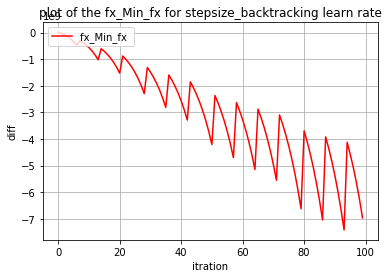

In [243]:
plt.plot(itr,diff, "r" ,label = "fx_Min_fx ")
plt.title("plot of the fx_Min_fx for stepsize_backtracking learn rate")
plt.xlabel("itration")
plt.ylabel("diff")
plt.legend(loc="upper left")
plt.grid()
plt.show()

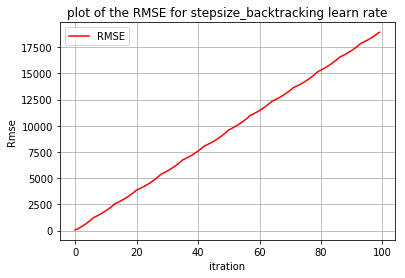

In [244]:
plt.plot(itr,Rmse, "r" ,label = "RMSE")
plt.title("plot of the RMSE for stepsize_backtracking learn rate")
plt.xlabel("itration")
plt.ylabel("Rmse")
plt.legend(loc="upper left")
plt.grid()
plt.show()